## Лабораторная работа "Введение в ML"

В этой лабораторной вы:

- познакомитесь с базовыми библиотеками для работы с табличными данными — `numpy` и `pandas`
- поближе посмотрите на простейшие задачи машинного обучения: классификацию и регрессию
- попробуете несколько метрик и поймёте, почему выбор метрики это важно
- обучите несколько простых моделей
- увидите связь между сложностью модели и переобучением
- убедитесь, что без данных всё тлен

Загрузка самых базовых библиотек:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

### [NumPy](https://numpy.org/doc/stable/user/index.html)

С 1995 numeric, с 2006 NumPy — «Numerical Python extensions» или просто «NumPy»

Возможности библиотеки NumPy:
* работать с многомерными массивами (таблицами)
* быстро вычислять математические функций на многомерных массивах

Ядро пакета NumPy — объект [ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)

**Важные отличия** между NumPy arrays и Python sequences:
* NumPy array имеет фиксированную длину, которая определяется в момент его создания (в отличие от Python lists, которые могут расти динамически)
* Элементы в NumPy array должны быть одного типа
* Можно выполнять операции непосредственно над NumPy arrays

**Скорость** NumPy достигается с помощью:
* реализации на C
* векторизации и броадкастинга (broadcasting). Например, произведение массивов совместимых форм.

Теперь давайте разберёмся подробнее и сделаем что-нибудь приятное и полезное в `numpy`!

### Индексация

В NumPy работает привычная индексация Python, ура! Включая использование отрицательных индексов и срезов (slices)

<div class="alert alert-info">
<b>Замечание 1:</b> Индексы и срезы в многомерных массивах не нужно разделять квадратными скобками,
т.е. вместо <b>matrix[i][j]</b> нужно использовать <b>matrix[i, j]</b>. Первое тоже работает, но сначала выдаёт строку i, потом элемент j в ней.
</div>

<div class="alert alert-danger">
<b>Замечание 2:</b> Срезы в NumPy создают view, а не копии, как в случае срезов встроенных последовательностей Python (string, tuple and list).
</div>

In [ ]:
ones_matrix = np.ones((5, 5))
ones_submatrix_view = ones_matrix[::2,::2] # creates a view, not copy
ones_matrix[::2,::2] = np.zeros((3, 3))
ones_submatrix_view

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

### Ссылка на Яндекс.Контест

Решения и ответы в задачах, расположенных ниже, загружайте в контест на автоматическую проверку:
https://new.contest.yandex.ru/60376/start


**1.** Реализуйте функцию, принимающую на вход два одномерных массива `first_array` и `second_array` и возвращающую матрицу, в которой первый массив соответствует первому столбцу матрицы, второй — второму.

Вероятно первое, что приходит вам на ум, это конкатенация и транспонирование:

In [ ]:
def construct_matrix(first_array, second_array):
    """
    Construct matrix from pair of arrays
    :param first_array: first array
    :param second_array: second array
    :return: constructed matrix
    """
    return np.vstack([first_array, second_array]).T # <- your first right code here

In [ ]:
construct_matrix(np.array([1,2]),np.array([3,4]))

array([[1, 3],
       [2, 4]])

(в скобках заметим, что конкатенировать можно vertically, horizontally, depth wise методами vstack, hstack, dstack по трём осям (0, 1 и 2, соотвественно), либо в общем случае `np.concatenate` — поиграйтесь ниже с прекрасным примером четырёхмерной точки, чтобы точно всё для себя понять)

In [ ]:
p = np.arange(1).reshape([1, 1, 1, 1])
p

array([[[[0]]]])

In [ ]:
print("vstack: ", np.vstack((p, p)).shape)
print("hstack: ", np.hstack((p, p)).shape)
print("dstack: ", np.dstack((p, p)).shape)

vstack:  (2, 1, 1, 1)
hstack:  (1, 2, 1, 1)
dstack:  (1, 1, 2, 1)


In [ ]:
np.concatenate((p, p), axis=3).shape

(1, 1, 1, 2)

Но, поскольку операция транспонирования [делает массив non-contiguous](https://numpy.org/doc/stable/user/basics.copies.html#other-operations), мы в этой задаче **запретим** ей пользоваться и порекомедуем воспользоваться, например, методом [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).

In [ ]:
def construct_matrix(first_array, second_array):
    """
    Construct matrix from pair of arrays
    :param first_array: first array
    :param second_array: second array
    :return: constructed matrix
    """
    return np.column_stack([first_array, second_array])

construct_matrix(np.array([1,2]),np.array([3,4]))

array([[1, 3],
       [2, 4]])

In [ ]:
import numpy as np

def construct_matrix(first_array, second_array):
    """
    Construct matrix from pair of arrays
    :param first_array: first array
    :param second_array: second array
    :return: constructed matrix
    """
    stacked = np.dstack([first_array, second_array])
    return stacked.reshape(-1, 2)

construct_matrix(np.array([1,2]),np.array([3,4]))

array([[1, 3],
       [2, 4]])

**2.** Реализуйте функцию, принимающую на вход массив целых неотрицательных чисел `nums` и возвращающую самый частый элемент массива.

In [ ]:
import numpy as np

def most_frequent(nums):
    """
    Find the most frequent value in an array
    :param nums: array of ints
    :return: the most frequent value
    """
    if len(nums) == 0:
        return None

    values, counts = np.unique(nums, return_counts=True)
    max_count_index = np.argmax(counts)
    return values[max_count_index]

### Переходим к работе с данными

Прежде всего, загрузим данные и сделаем из них красивые pandas-таблички. Они взяты из параллели RecSys соревнования https://yandex.ru/cup/ml/. Но мы будем иметь дело не со всеми данными, а только с их частью. Данные у нас будут про заведения общественного питания (больше бюрократический терминологии!)

Файлы с данными можно найти [здесь](https://disk.yandex.ru/d/YWvCNRQMb7QSQA).

Задачей будет **предсказание среднего чека** (average_bill) по некоторым другим свойствам заведения.

In [ ]:
base = '/home/avalur/autohw/'

In [112]:
base = '/content/'

In [113]:
import pandas as pd

data = pd.read_csv(base + 'organisations.csv')
features = pd.read_csv(base + 'features.csv')
rubrics = pd.read_csv(base + 'rubrics.csv')

В основном мы будем работать с табличкой `data`; остальное вам может пригодиться, если вы захотите знать, какое содержание стоит за кодами признаков.

## Изучение данных

Посмотрите на данные. В этом вам поможет метод ``head`` pandas-таблички.

In [ ]:
# <Your code here>
data.head(10)

,org_id,city,average_bill,rating,rubrics_id,features_id
0,15903868628669802651,msk,1500.0,4.270968,30776 30774,3501685156 3501779478 20422 3502045016 3502045...
1,16076540698036998306,msk,500.0,4.375000,30771,1509 1082283206 273469383 10462 11617 35017794...
2,8129364761615040323,msk,500.0,4.000000,31495,10462 11177 11617 11629 1416 1018 11704 11867 ...
3,15262729117594253452,msk,500.0,4.538813,30776 30770,3501618484 2020795524 11629 11617 1018 11704 2...
4,13418544315327784420,msk,500.0,4.409091,31495,11617 10462 11177 1416 11867 3501744275 20282 ...
5,4997872545011433005,msk,500.0,4.541667,31495,273469383 20422 20282 11629 3501745827 11617 1...
6,9129259535187484854,msk,500.0,4.015267,30776 30771,273469383 20424 20282 11617 11177 10462 20422 ...
7,8361679950520236967,msk,500.0,4.446154,30776 30777,1415 1018 1524 11617 11867 11629 11177 11704 1...
8,11913692756639492916,spb,500.0,3.600000,30777,3501744275 3501618484 20424 11741 11617 12048 ...
9,17739408339297875651,spb,500.0,4.276219,30771,10462 11177 11617 11629 1018 11704 3501744275 ...


Полезно посмотреть внимательнее на то, с какими признаками нам предстоит работать.

* **org_id** вам не понадобится;
* **city** - город, в котором находится заведение (``msk`` или ``spb``);
* **average_bill** - средний чек в заведении - он будет нашим таргетом;
* **rating** - рейтинг заведения;
* **rubrics_id** - тип заведения (или несколько типов). Соответствие кодов каким-то человекочитаемым типам живёт в табличке ``rubrics``
* **features_id** - набор неких фичей заведения. Соответствие кодов каким-то человекочитаемым типам живёт в табличке ``features``

Обратите внимание, что **rubrics_id** и **features_id** - это не списки, а разделённые пробелами строки. Когда вам захочется работать с отдельными фичами из мешка фичей для данного заведения, вам придётся всё-таки превратить их в списки (здесь поможет метод `split` для строк).

Чтобы быстро восстанавливать по рубрикам и фичам их нормальные названия, сделайте словари вида ``код_фичи:название_фичи``

In [ ]:
print(data['features_id'][0])


3501685156 3501779478 20422 3502045016 3502045032 3501618484 11177 11012 2020795524 10894 3501599541 12048 10462 1524 1509 3501498187 11867 1416 3501744275 3501942428 273469383 11704 1189498238 20424 21247 3501481353 3491142672 3501481355 1082283206 11741 3501471642 3501498186 11629 11617 10886 1415 3501513153 1018 246 3501749289 11531


In [ ]:
features.head(5)

,feature_id,feature_name
0,1,prepress_and_post_printing_processing
1,40,products
2,54,printing_method
3,77,fuel
4,79,shop


In [ ]:
rubrics.head(5)

,rubric_id,rubric_name
0,30519,"Булочная, пекарня"
1,30770,"Бар, паб"
2,30771,Быстрое питание
3,30774,Кафе
4,30775,Пиццерия


In [114]:
rubrics_dict = rubrics.set_index('rubric_id')['rubric_name'].to_dict()
features_dict = features.set_index('feature_id')['feature_name'].to_dict()
rubric_dict = rubrics_dict
rubrics_dict[30519], features_dict[54]

('Булочная, пекарня', 'printing_method')

Посмотрим, какими бывают типы заведений:

In [ ]:
rubric_dict

{30519: 'Булочная, пекарня',
 30770: 'Бар, паб',
 30771: 'Быстрое питание',
 30774: 'Кафе',
 30775: 'Пиццерия',
 30776: 'Ресторан',
 30777: 'Столовая',
 31286: 'Спортбар',
 31350: 'Кондитерская',
 31375: 'Суши-бар',
 31401: 'Кальян-бар',
 31495: 'Кофейня',
 3108292683: 'Бар безалкогольных напитков',
 3501514558: 'Фудкорт',
 3501750896: 'Кофе с собой'}

Мы что-то поняли про признаки, которыми нам предстоит пользоваться. Теперь время посмотреть на таргет. Вооружившись функциями ``hist`` и ``scatter`` из библиотеки ``matplotlib``, а также методом ``isna`` для pandas-таблиц разберитесь, какие значения принимают таргеты, есть ли там там выбросы, пропуски или ещё какие-то проблемы.

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    <ol>
      <li>Среди таргетов довольно много пропусков;</li>
      <li>Все таргеты - это числа, кратные 500;</li>
      <li>Есть какие-то адские значения, превышающие 100 000 (видимо, выбросы);</li>
      <li>В целом, число ресторанов с данным средним чеком быстро падает с ростом среднего чека. Для средних чеков, больших 2500, заведений уже совсем мало. Примерно у 2/3 заведений средний чек 500.</li>
    </ol>
</details>

In [ ]:
data.groupby('city')['average_bill'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
msk,21412.0,1347.048384,51502.765192,500.0,500.0,500.0,1000.0,7502000.0
spb,11366.0,735.746965,1149.650036,500.0,500.0,500.0,500.0,65500.0


In [115]:
# General information about missing values
print("=== GENERAL MISSING VALUES ANALYSIS ===")
print("Data dimensions:", data.shape)
print("\nNumber of missing values by column:")
print(data.isna().sum())
print("\nPercentage of missing values by column:")
print((data.isna().sum() / len(data) * 100).round(2))

=== GENERAL MISSING VALUES ANALYSIS ===
Data dimensions: (68339, 6)

Number of missing values by column:
org_id              0
city                0
average_bill    35561
rating          13731
rubrics_id          0
features_id     11049
dtype: int64

Percentage of missing values by column:
org_id           0.00
city             0.00
average_bill    52.04
rating          20.09
rubrics_id       0.00
features_id     16.17
dtype: float64


In [116]:
data_cleared = data[(data['features_id'].notna()) & (data['average_bill'].notna())]
print(data_cleared.isna().sum())
print('\n')
print(data_cleared.shape)

org_id             0
city               0
average_bill       0
rating          4454
rubrics_id         0
features_id        0
dtype: int64


(32778, 6)


In [ ]:
data_cleared.groupby('city')['average_bill'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
msk,21412.0,1347.048384,51502.765192,500.0,500.0,500.0,1000.0,7502000.0
spb,11366.0,735.746965,1149.650036,500.0,500.0,500.0,500.0,65500.0


**Базовая очистка данных**

Раз есть треш, давайте чистить данные.

С пропусками можно бороться по-разному (даже и с пропусками в таргете), но пока мы сделаем самую простую вещь: дропнем все заведения, для которых мы не знаем средний чек.

Уберите из них все заведения, у которых средний чек неизвестен или превышает 2500. Пока есть опасение, что их слишком мало, чтобы мы смогли обучить на них что-нибудь.

**3. Введите в Контест количество заведений, которое у вас получилось после очистки**.

Дальше мы будем работать с очищенными данными.

In [117]:
# <Your code here>
data_cleared_requested = data[(data['average_bill'] <= 2500) & (data['average_bill'].notna())]
print(data_cleared_requested.isna().sum())
print('\n')
print(data_cleared_requested.shape)

org_id             0
city               0
average_bill       0
rating          4318
rubrics_id         0
features_id        0
dtype: int64


(32136, 6)


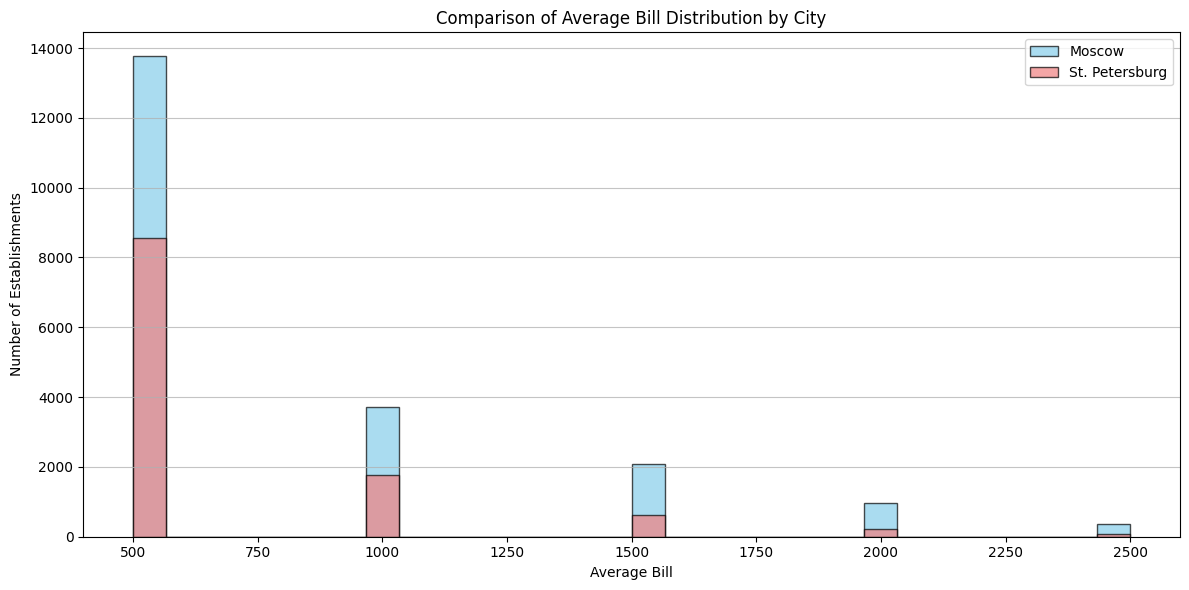

In [118]:
import matplotlib.pyplot as plt

# Filter data for Moscow
data_msk = data_cleared_requested[data_cleared_requested['city'] == 'msk']['average_bill']

# Filter data for St. Petersburg
data_spb = data_cleared_requested[data_cleared_requested['city'] == 'spb']['average_bill']

plt.figure(figsize=(12, 6))

# Both histograms on one plot
plt.hist(data_msk, bins=30, edgecolor='black', color='skyblue', alpha=0.7, label='Moscow')
plt.hist(data_spb, bins=30, edgecolor='black', color='lightcoral', alpha=0.7, label='St. Petersburg')

plt.title('Comparison of Average Bill Distribution by City')
plt.xlabel('Average Bill')
plt.ylabel('Number of Establishments')
plt.grid(axis='y', alpha=0.75)
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
data_cleared_requested

,org_id,city,average_bill,rating,rubrics_id,features_id
0,15903868628669802651,msk,1500.0,4.270968,30776 30774,3501685156 3501779478 20422 3502045016 3502045...
1,16076540698036998306,msk,500.0,4.375000,30771,1509 1082283206 273469383 10462 11617 35017794...
2,8129364761615040323,msk,500.0,4.000000,31495,10462 11177 11617 11629 1416 1018 11704 11867 ...
3,15262729117594253452,msk,500.0,4.538813,30776 30770,3501618484 2020795524 11629 11617 1018 11704 2...
4,13418544315327784420,msk,500.0,4.409091,31495,11617 10462 11177 1416 11867 3501744275 20282 ...
...,...,...,...,...,...,...
68328,17662684569129497551,spb,1000.0,4.561707,30776,246 3501779478 1018 3501618484 3501481353 3501...
68329,5700899951016592061,msk,1500.0,4.377129,31401,3501773763 10462 1018 246 3501779478 350175479...
68330,4686040819909966338,msk,1500.0,3.666667,30776,10462 1189498238 11629 1416 1415 11741 3501481...
68331,12499715465202129892,msk,1500.0,4.554577,30770 30776 30774,273469383 10462 21247 1509 1416 3501618484 350...


**4. Посчитайте и введите в Контест разность между средними арифметическими average_bill в кафе Москвы и Санкт-Петербурга. Округлите ответ до целого.**

&nbsp;

<details>
  <summary>Небольшая подсказка</summary>
  Примените часто используемый метод groupby.
</details>

Давайте ещё немного поизучаем данные. Ответьте на вопросы:

1. Есть ли разница между средними чеками в Москве и Санкт-Петербурге?
2. Коррелирует ли средний чек с рейтингом?
3. Есть ли разница в среднем чеке между ресторанами и пабами (см. соответствующие типы из ``rubrics``)?

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    <ol>
      <li>В целом, да. Вы могли бы сравнить средние (в Москве больше) или медианы (они равны, потому что уж больно много где средний чек 500). Этого, конечно, мало для того, чтобы сделать вывод. Нужно проверять какие-то статические критерии, которые изучаются в курсе по статистике. Не будем останавливаться на этом подробно. Поскольку данные совсем не нормальные, никакой t-тест не сработает; мы бы предложили использовать критерий Манна-Уитни (см. википедию и функцию mannwhitneyu из библиотеки scipy.stats).</li>
      <li>Какая-то корреляция между ними есть но уж больно неубедительная (рекомендуем построим на одном графике boxplot рейтинга по каждому значению среднего чека для визуализации). Конечно, дна становится меньше с ростом среднего чека, но, видимо, в предсказании это особо не используешь;</li>
      <li>Несомненно, в ресторанах средний чек выше. Это и невооружённым глазом видно, и с помощью критерия Манна-Уитни можно проверить.</li>
    </ol>
</details>

In [19]:
# Есть ли разница между средними чеками в Москве и Санкт-Петербурге?

msk_mean = data_msk.mean()
spb_mean = data_spb.mean()

msk_mean - spb_mean

np.float64(116.43756751957676)

In [29]:
msk_mean = data_cleared_requested[data_cleared_requested['city'] == 'msk']['average_bill'].mean()
spb_mean = data_cleared_requested[data_cleared_requested['city'] == 'spb']['average_bill'].mean()

result = round(msk_mean - spb_mean)
print(result)

116


In [32]:
rubrics[rubrics['rubric_name']=='Кафе']

,rubric_id,rubric_name
3,30774,Кафе


In [38]:
cafe_data = data_cleared_requested[data_cleared_requested['rubrics_id'].str.contains(r'\b30774\b', na=False)]

msk_mean = cafe_data[cafe_data['city'] == 'msk']['average_bill'].mean()
spb_mean = cafe_data[cafe_data['city'] == 'spb']['average_bill'].mean()

result = round(msk_mean - spb_mean)
print(result)

142


In [119]:
# Коррелирует ли средний чек с рейтингом?

correlation = data_cleared_requested[['average_bill', 'rating']].dropna().corr().loc['average_bill', 'rating']
print(f"Correlation between average_bill and rating: {correlation:.4f}")

Correlation between average_bill and rating: 0.0903


In [25]:
# Есть ли разница в среднем чеке между ресторанами и пабами (см. соответствующие типы из rubrics)?

rubrics[rubrics['rubric_name']=='Бар, паб'], rubrics[rubrics['rubric_name']=='Ресторан']

(   rubric_id rubric_name
 1      30770    Бар, паб,
    rubric_id rubric_name
 5      30776    Ресторан)

## Формулируем задачу

Прежде, чем решать задачу, её надо сформулировать.

**Вопрос первый**: это классификация или регрессия? Подумайте над этим.

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    Ответ не столь однозначен, как хотелось бы. С одной стороны, таргет принимает всего четыре значения, и потому это может быть классификацией с 4 классами. С другой стороны, таргеты - это не абстрактные "треугольник", "круг", "квадрат", а вещественные числа, и когда мы вместо 500 предсказываем 2500, это явно хуже, чем вместо 1500 предсказать 2000. В целом, задачу можно решать и так, и так; мы будем смотреть на метрики обеих задач.
</details>

**Вопрос второй**: какие метрики мы будем использовать для оценки качества решения? Какие метрики вы предложили бы для этой задачи как для задачи классификации? А для этой задачи, как для задачи регрессии?

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    
    Начнём с классификации. Метрика accuracy не очень хороша из-за несбалансированности классов. Действительно, классификатор, который всегда говорит 500, будет иметь accuracy примерно 0.66, хотя это никак не отражает практическую ценность модели. Как мы увидим, самая большая проблема будет заключаться в том, чтобы научиться выделять заведения с большими чеками, а их меньше всего и в accuracy они вносят самый маленький вклад. Есть разные способы с этим бороться, один -- использовать sklearn.metrics.balanced_accuracy_score. Его идея, грубо говоря, в том, чтобы по каждому классу найти, какая доля объектов этого класса правильно классифицирована, а потом эти доли усреднить. Тогда у бессмысленного классификатора, который всем ставит 500, будет скор 1/5 (ведь классов 5), а чтобы получить прежние 2/3, нужно будет научиться в каждом классе правильно ставить хотя бы 2/3 меток.    
    
    Теперь что касается регрессии. Основых метрики две - MSE и MAE. Из первой стоит извлекать корень, чтобы получать интерпретируемые человеком значения, а вторая менее агрессивна к выбросам (впрочем, выбросов тут уже нет, мы их все выкинули). Без дополнительной информации не очень понятно, какую выбирать, можно брать любую. А выбирать надо: ведь даже банальные модели "предсказывай всегда среднее" и "предсказывай всегда медиану" будут по-разному ранжироваться этими метриками.
    
</details>

**Вопрос третий**: а не взять ли нам какую-нибудь более экзотическую метрику? Например, MAPE (определение в учебнике в главе про оценку качества моделей). А как вам такое соображение: допустим, заказчик говорит, что пользователи будут расстраиваться, только если мы завысили средний чек - так давайте поправим MSE или MAE, обнуляя те слагаемые, для которых предсказанный таргет меньше истинного. Вот это хорошая метрика или нет?

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    
    Что касается MAPE, у нас нет тех проблем, с которой она борется.   Вот если бы у нас были средние чеки от 500 до миллиона, мы бы столкнулись с ситуацией, что большие ошибки для больших чеков доминировали бы в сумме для MSE и MAE (500 вместо 1000 меркнет по сравнению с 500к вместо миллиона).
    Говоря поэтически, мы бы оптимизировали модель для миллионеров, забыв про простых трудяг. И было бы логично перейти от парадигмы "ошибаемся на 500 рублей" к парадигме "ошибаемся на 50%". Но у нас все таргеты примерно одного порядка, MAPE нам особо ни к чему.
    
    Вторая метрика коварна тем, что её можно "накрутить" безо всякой пользы для дела.
    А именно, модель, которая всегда предсказывает средний чек в миллион, была бы идеальна.
    Но все бы расстраивались и не ходили есть. Другое дело, что можно ввести разные веса для ошибок в большую и в меньшую сторону, но опять же - пока нет показаний к тому, что это нужно.
    
</details>

## Применяем ML

Теперь время разбить данные на обучающую и тестовую выборку. Делается это с помощью функции ``train_test_split`` из пакета ``sklearn``. При этом очень важно сделать две вещи:

* Зафиксировать ``random_state=42`` (да, именно этот, а то ваши модели могут не зайти в Контест), чтобы всё, что мы делаем, было воспроизводимо (иначе от перезапуска к перезапуску числа могут меняться, и мы не будем понимать, из-за чего это происходит).
* Сделать стратификацию по таргету. В противном случае у нас в трейне и тесте могут оказаться разные пропорции классов (обычно особенно страдают мало представленные классы), что неутешительно скажется на результате.

**Обратите внимание**, что если вы побьёте выборку на train и test по-другому, ваши результаты могут не зайти в контест.

In [ ]:
clean_data_train, clean_data_test = train_test_split(
    clean_data, stratify=clean_data['average_bill'], test_size=0.33, random_state=42)

Теперь нам нужен **бейзлайн** - очень простая модель, с которой мы в дальнейшем будем сравниваться.

Поскольку мы ещё не знаем никаких умных классов моделей, все модели мы будем писать руками. А именно, мы напишем две простых модели на основе ``sklearn.baseRegressorMixin`` и ``sklearn.base.ClassifierMixin`` (посмотрите примеры в документации sklearn и сделайте так же):

* Модель для задачи регрессии, которая для всех заведений предсказывает одно число — среднее значение среднего чека;
* Модель для задачи классификации, которая для всех заведений предсказывает один класс — самый частый класс (ироничным образом он в данном случае совпадает с медианой).

**Важно!** Мы будем много раз повторять вам мантру о том, что **информация из тестовой выборки не должна протекать в процесс обучения**. Так вот, и среднее, и самый частый класс вы должны считать именно на обучающей выборке!

**5 и 6. Напишите эти две модели и сдайте в Контест**. В процессе проверки модели будут и обучаться, и предсказывать.

Заметим, что для этих моделей нам вообще не нужны какие-то "фичи"; мы работаем только с таргетом.

У каждой модели есть (как минимум) два метода: `fit` (обучает модель по фичам `X` и таргету `y`) `predict` (предсказывает по фичам `X`)

In [120]:
from scipy.stats import mode
from sklearn.base import RegressorMixin

class MeanRegressor(RegressorMixin):
    def fit(self, X=None, y=None):
        self.value = y.mean()

    def predict(self, X=None):
        return np.full(shape=X.shape[0], fill_value=self.value)

In [121]:
from sklearn.base import ClassifierMixin

class MostFrequentClassifier(ClassifierMixin):

    def fit(self, X=None, y=None):
        self.value = y.median()

    def predict(self, X=None):
        return np.full(shape=X.shape[0], fill_value=self.value)

In [122]:
from sklearn.base import RegressorMixin, ClassifierMixin
import numpy as np
from scipy.stats import mode

class MeanRegressor(RegressorMixin):
    def __init__(self):
        self.mean_ = None

    def fit(self, X=None, y=None):
        self.mean_ = np.mean(y)
        return self

    def predict(self, X=None):
        if self.mean_ is None:
            raise ValueError("Model not fitted yet")
        n_samples = X.shape[0] if X is not None else 1
        return np.full(n_samples, self.mean_)

class MostFrequentClassifier(ClassifierMixin):
    def __init__(self):
        self.most_frequent_ = None

    def fit(self, X=None, y=None):
        # Используем numpy вместо scipy
        values, counts = np.unique(y, return_counts=True)
        self.most_frequent_ = values[np.argmax(counts)]
        return self

    def predict(self, X=None):
        if self.most_frequent_ is None:
            raise ValueError("Model not fitted yet")
        n_samples = X.shape[0] if X is not None else 1
        return np.full(n_samples, self.most_frequent_)

Обучим наши модели

In [123]:
from sklearn.model_selection import train_test_split
# data_cleared_requested
clean_data_train, clean_data_test = train_test_split(
    data_cleared_requested, stratify=data_cleared_requested['average_bill'], test_size=0.33, random_state=42)

In [124]:
reg = MeanRegressor()
reg.fit(y=clean_data_train['average_bill'])

clf = MostFrequentClassifier()
clf.fit(y=clean_data_train['average_bill'])

Обучите модели и оцените их качество на тестовой выборке. В качестве метрик возьмём RMSE (``np.sqrt`` от ``sklearn.metrics.mean_squared_error``) и ``sklearn.metrics.balanced_accuracy_score``.

Для регрессионной модели имеет смысл считать только RMSE (значения будут не кратны 500, точно мы угадывать не будем никогда), а вот для классификационной можно найти обе метрики. Сделайте это. Какая модель оказалась лучше по RMSE?

In [125]:
from sklearn.metrics import mean_squared_error, balanced_accuracy_score, accuracy_score
import numpy as np

# In their system (correct approach):
X_train = clean_data_train.drop('average_bill', axis=1)
y_train = clean_data_train['average_bill']
X_test = clean_data_test.drop('average_bill', axis=1)
y_test = clean_data_test['average_bill']

# Training ONLY on train data
reg = MeanRegressor()
reg.fit(X=X_train, y=y_train)  # X is ignored but formally passed

clf = MostFrequentClassifier()
clf.fit(X=X_train, y=y_train)

# Prediction on test
y_pred_reg = reg.predict(X=X_test)
y_pred_clf = clf.predict(X=X_test)

# Metrics on test
rmse_reg = np.sqrt(mean_squared_error(y_test, y_pred_reg))
rmse_clf = np.sqrt(mean_squared_error(y_test, y_pred_clf))
balanced_acc_clf = balanced_accuracy_score(y_test, y_pred_clf)
accuracy_score_clf = accuracy_score(y_test, y_pred_clf)

print(f"RMSE MeanRegressor: {rmse_reg:.2f}")
print(f"RMSE MostFrequentClassifier: {rmse_clf:.2f}")
print(f"Balanced Accuracy MostFrequentClassifier: {balanced_acc_clf:.4f}")
print(f"Accuracy: {accuracy_score_clf:.4f}")
print('\n')
if rmse_reg < rmse_clf:
    print("Better by RMSE: MeanRegressor")
else:
    print("Better by RMSE: MostFrequentClassifier")

RMSE MeanRegressor: 448.71
RMSE MostFrequentClassifier: 514.75
Balanced Accuracy MostFrequentClassifier: 0.2000
Accuracy: 0.6948


Better by RMSE: MeanRegressor


<details>
  <summary>Когда будете готовы, кликните сюда</summary>
    
  Казалось бы, регрессор никогда не угадывает, но он в каком-то смысле лучше классификатора - справедливо ли это? Возможно. Несуществующий пользователь модели вряд ли будет задавать вопросы "почему средний чек не кратен 500?" Ну, выдали около 800 - ок, понятно.
    
</details>

## Усложнение модели

Бейзлайны будут нашей отправной точкой. Строя дальнейшие модели, мы будем спрашивать себя: получилось ли лучше бейзлайна? Если нет или если не особо, то в чём смысл усложнения?

Начнём с использования фичи ``city``. Мы уже видели, что в разных городах и средние чеки разные. Легко проверить, что *медиана* средних чеков всё же одна и та же и в Москве, и в Санкт-Петербурге (ох уж этот вездесущий средний чек 500!), поэтому с классификатором мы ничего не сделаем. Но вот регрессор можно попробовать починить.

**7. Напишите регрессор, для каждого заведения предсказывающий среднее значение в том же городе (на обучающей выборке, конечно) и сдайте его в Контест**. Вам может помочь то, что булевы `pandas` и `numpy` столбцы можно умножать на численные — в такой ситуации False работает, как ноль, а True как единица.

In [126]:
from sklearn.base import RegressorMixin

class CityMeanRegressor(RegressorMixin):
    def fit(self, X=None, y=None):
        # X contains 'city' column, y - one-dimensional target array
        df = X.copy()
        df['target'] = y

        self.msk_mean = df[df['city'] == 'msk']['target'].mean()
        self.spb_mean = df[df['city'] == 'spb']['target'].mean()
        self.array = list()
        return self

    def predict(self, X=None):
        predictions = []
        for city in X['city']:
            if city == 'msk':
                predictions.append(self.msk_mean)
            else:
                predictions.append(self.spb_mean)
        return predictions

In [128]:
from sklearn.base import RegressorMixin
import numpy as np
import pandas as pd

class CityMeanRegressor(RegressorMixin):
    def __init__(self):
        self.means_ = {}

    def fit(self, X=None, y=None):
        """
        X must contain 'city' column
        """
        # Calculate means by city on training data
        df = X.copy()
        df['target'] = y

        self.means_ = df.groupby('city')['target'].mean().to_dict()
        return self

    def predict(self, X=None):
        """
        X must contain 'city' column
        """
        if not self.means_:
            raise ValueError("Model not fitted yet")

        # For each city substitute its mean value
        predictions = []
        for city in X['city']:
            predictions.append(self.means_.get(city, np.mean(list(self.means_.values()))))

        return np.array(predictions)

- Один проход по данным
- Векторизованная операция groupby
- Оптимизировано внутри Pandas

In [129]:
X_train = clean_data_train.drop('average_bill', axis=1)
y_train = clean_data_train['average_bill']
X_test = clean_data_test.drop('average_bill', axis=1)
y_test = clean_data_test['average_bill']

city_reg = CityMeanRegressor()
city_reg.fit(X=clean_data_train, y=clean_data_train['average_bill'])

y_pred_city = city_reg.predict(X=clean_data_test)
rmse_city = np.sqrt(mean_squared_error(clean_data_test['average_bill'], y_pred_city))

print(f"RMSE CityMeanRegressor: {rmse_city:.2f}")
print(f"RMSE MeanRegressor: {rmse_reg:.2f}")

if rmse_city < rmse_reg:
    print("✅ CityMeanRegressor is better!")
else:
    print("❌ CityMeanRegressor did not improve the result")

RMSE CityMeanRegressor: 445.11
RMSE MeanRegressor: 448.71
✅ CityMeanRegressor is better!


Обучите регрессор и сравните его по метрике RMSE с бейзлайнами. Получилось ли улучшить метрику?

Лучше стало, но, правда, не очень сильно. В этот момент очень важно не просто радовать руководителя приростом в третьем знаке, но и думать о том, что происходит.

Средний средний чек по Москве равен 793, в Санкт-Петербурге - 676, а в целом - 752 рубля. MSE, увы, не поможет вам ответить на вопрос, стало ли лучше пользователю, если вы ему вместо 752 рублей назвали 793. Здесь вскрывается весьма существенный порок MSE в этой задаче. Дело в том, что наш изначальный таргет делит заведения на некоторые "ценовые категории", и различие в средних чеках 500 и 1000 в самом деле существенно. Наверное, мы хотели бы как раз правильно предсказывать ценовые категории. Но MSE не очень помогает нам об этом судить. Дальше мы ещё подумаем, как это исправить.

В любом случае, несмотря на улучшение метрики, мы пока не можем судить, стало ли по жизни лучше от усложнения модели.

Поручинившись немного, возьмём на вооружение другую идею. Давайте использовать типы заведений!

Но с типами есть некоторая проблема: в столбце ``rubrics_id`` не всегда один идентификатор, часто их несколько, и всего комбинаций довольно много. Чтобы не возиться с малочисленными типами, давайте сольём их в один безликий ``other``.

Итак, добавьте в обучающие и тестовые данные столбец ``modified_rubrics``, в котором будет то же, что и в ``rubrics_id``, если соответствующая комбинация рубрик содержит хотя бы 100 заведений из обучающей (!) выборки, и строка ``other`` в противном случае.

Здесь вам поможет контейнер ``Counter`` из библиотеки ``collections``.

In [130]:
from collections import Counter

# Count frequency of rubric combinations in training data
rubric_counter = Counter(clean_data_train['rubrics_id'])
print(f"Unique rubric combinations: {len(rubric_counter)}")

# Create dictionary for modified rubrics
min_count = 100
modified_rubrics_map = {}

for rubric, count in rubric_counter.items():
    # if pd.isna(rubric):
    #     modified_rubrics_map[rubric] = 'other'
    if count >= min_count:
        modified_rubrics_map[rubric] = rubric
    else:
        modified_rubrics_map[rubric] = 'other'

# Apply to training and test datasets
clean_data_train['modified_rubrics'] = clean_data_train['rubrics_id'].map(modified_rubrics_map)
clean_data_test['modified_rubrics'] = clean_data_test['rubrics_id'].map(modified_rubrics_map)

# Fill missing values
clean_data_train['modified_rubrics'] = clean_data_train['modified_rubrics'].fillna('other')
clean_data_test['modified_rubrics'] = clean_data_test['modified_rubrics'].fillna('other')

# Check the result
print("\nDistribution of modified_rubrics in train:")
print(clean_data_train['modified_rubrics'].value_counts().head(10))
print(f"\nTotal unique values: {clean_data_train['modified_rubrics'].nunique()}")

Unique rubric combinations: 616

Distribution of modified_rubrics in train:
modified_rubrics
other          4212
30776          2672
30774          2661
31495          1693
30771          1530
30776 30774    1138
30774 30776    1127
30770          1048
30774 30771     481
30777           477
Name: count, dtype: int64

Total unique values: 28


- Векторизованная операция .map() - работает на уровне C
- Один проход по данным
- Оптимизировано внутри Pandas

In [93]:
clean_data_train

,org_id,city,average_bill,rating,rubrics_id,features_id,modified_rubrics
45769,3276960721840719260,msk,500.0,4.500000,30770,11704 20422 1018 11177 1416 11867 10462,30770
39061,8452997364765928283,msk,1500.0,4.442623,30774 30776,1415 3501481355 1416 11629 10462 1524 20422 11...,30774 30776
59281,14240408259222214074,spb,1000.0,4.018868,30776 30774,3502045032 11741 3502045016 10462 11704 350177...,30776 30774
51225,15114069072602161053,msk,1500.0,4.364742,31401 30776,3501513153 3501779478 3491142672 273469383 350...,other
29587,2730337118800634815,msk,1000.0,4.698718,30770,21247 10896 3491142672 11629 3501481353 350148...,30770
...,...,...,...,...,...,...,...
64667,15641319025413596274,msk,500.0,4.510753,30771,20424 3501744275 273469383 10462 11177 11617 1...,30771
47309,2049892259403324519,msk,500.0,4.333333,30771,273469383 20424 11704 11629 10462 20422 1018,30771
26208,12224074314753892871,msk,500.0,5.000000,30775,21247 11867 11629 1524 1509 20422 1416 1415 10...,30775
48599,16581456988770474074,msk,500.0,4.692308,31495 30774,3491142672 20282 3501637468 11741 3501745827 3...,31495 30774


Теперь настало время написать могучий классификатор, который по заведению предсказывает медиану средних чеков среди тех в обучающей выборке, у которых с ним одинаковые `modified_rubrics` и город (вы спросите, почему медиану, а не самый частый -- спишем это на вдохновение; самый частый тоже можно брать - но медиана работает лучше).

**8. Напишите классификатор и сдайте в Контест**.

In [131]:
from sklearn.base import ClassifierMixin
import numpy as np
import pandas as pd

class RubricCityMedianClassifier(ClassifierMixin):
    def fit(self, X=None, y=None):
        # Create DataFrame for grouping
        df = X[['city', 'modified_rubrics']].copy()
        df['target'] = y

        # Group only by pairs that exist in train data
        self.median_dict_ = df.groupby(['city', 'modified_rubrics'])['target'].median().to_dict()

        # Remember global median for new combinations
        self.global_median_ = y.median()

        return self

    def predict(self, X=None):
        predictions = []

        for i, row in X.iterrows():
            key = (row['city'], row['modified_rubrics'])
            # If combination exists in train - use its median, otherwise use global median
            pred = self.median_dict_.get(key, self.global_median_)
            predictions.append(pred)

        return np.array(predictions)

- Без утечек: использует только трейновые данные
- Эффективность: O(n_test) вместо O(n_test × n_pairs)
- Надежность: обрабатывает новые комбинации через глобальную медиану

In [132]:
# Train the model
rubrics_clf = RubricsCityClassifier()
rubrics_clf.fit(X=clean_data_train, y=clean_data_train['average_bill'])

# Make predictions
y_pred_rubrics = rubrics_clf.predict(X=clean_data_test)

# Evaluate quality
rmse_rubrics = np.sqrt(mean_squared_error(clean_data_test['average_bill'], y_pred_rubrics))
balanced_acc_rubrics = balanced_accuracy_score(clean_data_test['average_bill'], y_pred_rubrics)
accuracy_score_rubrics = accuracy_score(clean_data_test['average_bill'], y_pred_rubrics)

print(f"RMSE RubricsCityClassifier: {rmse_rubrics:.2f}")
print(f"Balanced Accuracy RubricsCityClassifier: {balanced_acc_rubrics:.4f}")
print(f"Accuracy: {accuracy_score_rubrics:.4f}")
print(f"Base Accuracy: {accuracy_score_clf:.4f}")

RMSE RubricsCityClassifier: 393.97
Balanced Accuracy RubricsCityClassifier: 0.3055
Accuracy: 0.7096
Base Accuracy: 0.6948


Сравните обученный классификатор по метрикам RMSE и balanced_accuracy_score с нашими бейзлайнами. Получилось ли улучшить?

Обратите внимание что рост accuracy по сравнению с бейзлайном при этом на порядок меньше:

accuracy_score

Predict most frequent:  0.6947666195190948

Predict by rubric and city:  0.7095709570957096

Для диагностики напечатайте для каждого класса тестовой выборки, сколько в нём объектов и скольким из них наш классификатор приписал правильный класс. Что вы видите?

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    
  Вы, вероятно, видите то, что мы стали однозначно лучше по сравнению с бейзлайном детектировать средний чек 1000 и 1500 (хотя всё равно не очень хорошо + ценой ухудшения качества на среднем чеке 500), а вот чеки 2000 и 2500 нам ну никак не даются.
    
</details>

In [136]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Predictions
y_pred = clf.predict(X_test)
y_true = y_test

# Create DataFrame for analysis
results = pd.DataFrame({
    'true': y_true,
    'pred': y_pred,
    'correct': y_true == y_pred
})

# Analysis by class
print("=== CLASSIFIER DIAGNOSTICS ===")
print(f"Total objects in test: {len(y_test)}")
print()

# For each class
unique_classes = sorted(y_true.unique())
for cls in unique_classes:
    class_mask = y_true == cls
    n_total = class_mask.sum()
    n_correct = (y_true[class_mask] == y_pred[class_mask]).sum()

    print(f"Class {cls}:")
    print(f"  Total objects: {n_total}")
    print(f"  Correctly predicted: {n_correct}")
    print(f"  Accuracy: {n_correct/n_total:.2%}")
    print()

# Confusion matrix
print("=== CONFUSION MATRIX ===")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# Detailed report - handle the warning properly
print("\n=== DETAILED REPORT ===")
try:
    print(classification_report(y_true, y_pred, zero_division=0))
except UndefinedMetricWarning:
    print(classification_report(y_true, y_pred, zero_division=0))

=== CLASSIFIER DIAGNOSTICS ===
Total objects in test: 10605

Class 500.0:
  Total objects: 7368
  Correctly predicted: 7368
  Accuracy: 100.00%

Class 1000.0:
  Total objects: 1809
  Correctly predicted: 0
  Accuracy: 0.00%

Class 1500.0:
  Total objects: 890
  Correctly predicted: 0
  Accuracy: 0.00%

Class 2000.0:
  Total objects: 391
  Correctly predicted: 0
  Accuracy: 0.00%

Class 2500.0:
  Total objects: 147
  Correctly predicted: 0
  Accuracy: 0.00%

=== CONFUSION MATRIX ===
[[7368    0    0    0    0]
 [1809    0    0    0    0]
 [ 890    0    0    0    0]
 [ 391    0    0    0    0]
 [ 147    0    0    0    0]]

=== DETAILED REPORT ===
              precision    recall  f1-score   support

       500.0       0.69      1.00      0.82      7368
      1000.0       0.00      0.00      0.00      1809
      1500.0       0.00      0.00      0.00       890
      2000.0       0.00      0.00      0.00       391
      2500.0       0.00      0.00      0.00       147

    accuracy         

Answer: Why the solution is poor

1. Task mixing: Using median (regression) for classification
2. Lack of learning: The model simply memorizes statistics rather than learning patterns
3. Non-reusable pipeline:
   * `modified_rubrics` is computed on the entire dataset before splitting
   * When retraining, rubrics need to be recalculated from scratch
   * Impossible to perform proper cross-validation
4. Generalization problems: Performs poorly with rare classes and new combinations

**Кстати**. А вы понимаете, почему приведённый выше пайплайн классификации был не очень удачным с точки зрения архитектуры? Почему его было бы правильнее воплотить по-другому?

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
Собственно говоря, и не было никакого пайплайна. К счастью, у нас была одна обучающая выборка, мы на ней посчитали список рубрик для modified_rubrics и радовались жизни. Но если бы нам надо было переобучать всё на новых данных, пришлось бы помнить, что их надо везде пересчитать (ведь у нас могли появиться новые рубрики с хотя бы 100 представителями). А уж никакую кросс-валидацию (кто знает - тот поймёт) с нашим подходом к делу и вовсе бы не получилось сделать без боли.
    
Поэтому в следующей лабораторной вы научитесь делать честные пайплайны, в которых преобразование данных, генерация фичей и обучение классификатора будут объединены в один понятный процесс, происходящий на этапе fit.
</details>

## Слишком простые и слишком сложные модели

Бейзлайны у нас слишком просты и потому не очень полезны в жизни. Но если сложность модели растёт бесконтрольно, то тоже получается плохо.

Давайте рассмотрим конкретный пример. Создадим классификатор, использующий одновременно `rubrics_id` и `features_id`.

Сделайте следующее:

- для каждого объекта обучающей выборки сконкатенируйте строку `rubrics_id` с разделителем (например, буквой 'q') и содержимым `features_id`. Полученный столбец озаглавьте `modified_features`. Это не самый клёвый способ заиспользовать все фичи, но сейчас пока сойдёт. Причём на сей раз не будем выкидывать мало представленные значения (вся информация важна, не так ли?).
- при этом для тестовой выборке заменяйте на строку `other` все конкатенации, которые не встретились в обучающей выборке.

То есть элементы в этом столбце будут иметь вид `other` или `30776 30774 q 3502045032 11741 3502045016 1046...`.

Теперь обучите классификатор, который для заведения предсказывает медиану среднего чека по всем объектам тестовой выборки с таким же, как у него, значением `modified_features`, а если такого в обучающей выборке нет, то глобальную медиану среднего чека по всей обучающей выборке.

**9. Загрузите в Контест предсказания этого классификатора на тестовой выборке**

Мы ждём файла **.csv**, у которого в каждой строке будет только одно число - предсказание классификатора.

Возможно, вам будет полезна библиотека ``tqdm``, позволяющая отслеживать в реальном времени, сколько времени уже крутится цикл и сколько итераций ещё осталось. Впрочем, если вы всё написали нормально, то должно работать не очень долго.

In [109]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import mean_squared_error, balanced_accuracy_score
import warnings

# Filter data
filtered = data[data["average_bill"].notna() & (data["average_bill"] <= 2500)]

# 1. Create modified_features
def create_modified_features(df):
    """Creates concatenated features rubrics_id + features_id"""
    return df['rubrics_id'].astype(str) + 'q' + df['features_id'].astype(str)

# Apply to train and test
clean_data_train['modified_features'] = create_modified_features(clean_data_train)
clean_data_test['modified_features'] = create_modified_features(clean_data_test)

# Replace unknown features in test with 'other'
train_features = set(clean_data_train['modified_features'])
clean_data_test['modified_features'] = clean_data_test['modified_features'].apply(
    lambda x: x if x in train_features else 'other'
)

# 2. Classifier
class ModifiedFeaturesMedianClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.medians_ = None
        self.global_median_ = None

    def fit(self, X, y):
        # Create DataFrame for grouping
        df = pd.DataFrame({
            'modified_features': X['modified_features'],
            'target': y
        })

        # Calculate medians by groups
        self.medians_ = df.groupby("modified_features")["target"].median().to_dict()

        # Add 'other' with global median
        self.global_median_ = float(y.median())
        self.medians_['other'] = self.global_median_

        return self

    def predict(self, X):
        # Predict median for each group
        preds = X['modified_features'].map(self.medians_)

        # Fill missing values (should already be handled by 'other')
        preds = preds.fillna(self.global_median_).to_numpy(dtype=float)

        return preds

# 3. Train and predict
clf = ModifiedFeaturesMedianClassifier()
clf.fit(clean_data_train, clean_data_train["average_bill"])

# Predictions for train and test
train_preds = clf.predict(clean_data_train)
test_preds = clf.predict(clean_data_test)

# 4. Save for contest (only test predictions)
pd.DataFrame({"prediction": test_preds}).to_csv("predictions.csv", index=False, header=False)

# 5. Evaluate quality
# Suppress warnings about classes not in y_true
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning, message="y_pred contains classes not in y_true")

    rmse_train = np.sqrt(mean_squared_error(clean_data_train["average_bill"], train_preds))
    rmse_test = np.sqrt(mean_squared_error(clean_data_test["average_bill"], test_preds))

    # Round predictions to nearest integer class
    train_preds_class = np.round(train_preds).astype(int)
    test_preds_class = np.round(test_preds).astype(int)

    bal_acc_train = balanced_accuracy_score(clean_data_train["average_bill"], train_preds_class)
    bal_acc_test = balanced_accuracy_score(clean_data_test["average_bill"], test_preds_class)

    # bal_acc_train = balanced_accuracy_score(clean_data_train["average_bill"], train_preds)
    # bal_acc_test = balanced_accuracy_score(clean_data_test["average_bill"], test_preds)

print("=== RESULTS ===")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Train Balanced Accuracy: {bal_acc_train:.4f}")
print(f"Test Balanced Accuracy: {bal_acc_test:.4f}")

# Overfitting analysis
print(f"\n=== OVERFITTING ANALYSIS ===")
print(f"RMSE difference (test - train): {rmse_test - rmse_train:.2f}")
print(f"Number of unique modified_features in train: {len(set(clean_data_train['modified_features']))}")
print(f"Number of 'other' in test: {(clean_data_test['modified_features'] == 'other').sum()}")

=== RESULTS ===
Train RMSE: 32.42
Test RMSE: 513.99
Train Balanced Accuracy: 0.9932
Test Balanced Accuracy: 0.2010

=== OVERFITTING ANALYSIS ===
RMSE difference (test - train): 481.57
Number of unique modified_features in train: 20915
Number of 'other' in test: 10126


- Train RMSE низка - полное переобучение (каждая группа имеет свою медиану)
- Test RMSE значительно выше из-за категории 'other'

Модель, очевидно, очень сложная. Число параметров (различных категорий) в ней сопоставимо с числом объектов в обучающей выборке. А получилось ли хорошо?

Давайте посчитаем RMSE и balanced_accuracy_score на обучающей и на тестовой выборках.

**10. Введите их в Контест**

Налицо переобучение: на трейне метрики отличные, на тесте - вообще никакие

В общем, не гонитесь за чрезмерной сложностью модели..

## ML без данных что компутер без электричества

Возможно, вы смотрите на полученные выше результаты и думаете: вот если бы мы не какие-то убогие медианы предсказывали, а гоняли бы нейросети, то тут-то бы всё и получилось!

Но, увы, совсем даже не всегда от счастья нас отделяет выбор хорошей модели (и стратегии обучения). Если данные не очень, то даже самая крутая модель не сработает. В этой ситуации нужно либо добывать новые фичи каким-то образом, либо собирать новые данные (увеличивать датасет), либо просто бросать задачу.

Давайте посмотрим, что выжмет из наших данных одна из самых мощных моделей для табличных данных - градиентный бустинг на решающих деревьях в исполнении [CatBoost](https://catboost.ai/).

Но прежде, чем сделать fit, нам надо облагородить данные. Несмотря на то, что CatBoost отлично работает с категориальными фичами, мешок признаков из `rubrics_id` или `features_id` может ему оказаться не по зубам. Поэтому мы соберём датасет в пристойную матрицу, создав для каждого типа рубрик и фичей отдельный столбец и записав там единицы для тех объектов, у которых эта рубрика или фича имеет место.

В матрице почти все элементы будут нулями. Такие матрицы считаются **разреженными** и их можно хранить гораздо эффективней, чем просто таблицей. Этим и займёмся)

Есть несколько форматов хранения разреженных матриц (многие из них реализованы в [пакете sparse библиотеки scipy](https://docs.scipy.org/doc/scipy/reference/sparse.html)), и каждый пригоден для чего-то своего.

Создавать разреженную матрицу лучше в [формате COO](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_array.html#scipy.sparse.coo_array). Он предполагает, что разреженная матрица задаётся в виде трёх списков: `row`, `col`, `data`, причём каждая тройка `(row[i], col[i], data[i])` кодирует элемент со значением `data[i]`, стоящий на позиции `(row[i], col[i])`. Считается, что на позициях `(row, col)`, которые ни разу не встретились, стоят нули.

Нетрудно видеть, что заполнять такую матрицу - одно удовольствие, и особенно этому помогает тот факт, что **пара `(row, col)` может встретиться несколько раз** (тогда в итоговой матрице на соответствующей позиции стоит сумма соответствующих `data[i]`). Но, с другой стороны, почти ничего другого с такой матрицей не сделаешь: произвольного доступа к элементам она не предоставляет, умножить её тоже особо ничего не умножишь. Поэтому для дальнейшего использования созданную таким образом матрицу преобразуют в один из более удобных форматов, например, [CSR (compressed sparse row)](https://scipy-lectures.org/advanced/scipy_sparse/csr_matrix.html). Он, к примеру, хорошо подходит для умножения на вектор (потому что матрица хранится по строкам). Не будем разбирать его подробно, но можете почитать по ссылке, если интересно.

Вам нужно будет превратить обучающие и тестовые данные в разреженные матрицы `sparse_data_train` и `sparse_data_test` соответственно, таким образом, что:

- столбец `city` превратится в столбец из единиц и нулей (например, 1 - Москва, 0 - Питер);
- столбец `rating` перекочует в разреженные матрицы без изменений;
- каждый типы рубрик и каждая фича превратятся в отдельный 0-1-принак;

В тестовой выборке будут фичи, которых в обучающей выборке не было. С ними можно по-разному работать, но давайте создадим дополнительную фантомную фичу `feature_other`, в которой будет то, сколько неизвестных по обучающей выборке фичей есть у данного объекта.

In [102]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.2 MB/s eta 0:00:00


In [108]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix, hstack
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from catboost import CatBoostClassifier

def build_sparse_matrix(train_df, test_df):
    """
    Builds sparse matrices for train and test data
    """
    # Handle NaN values
    train_df = train_df.copy()
    test_df = test_df.copy()
    train_df['rubrics_id'] = train_df['rubrics_id'].fillna('')
    train_df['features_id'] = train_df['features_id'].fillna('')
    test_df['rubrics_id'] = test_df['rubrics_id'].fillna('')
    test_df['features_id'] = test_df['features_id'].fillna('')

    # --- 1. City encoding (binary msk=1, spb=0)
    city_train = (train_df['city'] == 'msk').astype(int).values.reshape(-1, 1)
    city_test = (test_df['city'] == 'msk').astype(int).values.reshape(-1, 1)

    # --- 2. Rating (keep numeric)
    rating_train = train_df[['rating']].fillna(0).values
    rating_test = test_df[['rating']].fillna(0).values

    # --- 3. Expand rubrics_id and features_id into sets
    train_rubrics = train_df['rubrics_id'].str.split()
    train_features = train_df['features_id'].str.split()
    test_rubrics = test_df['rubrics_id'].str.split()
    test_features = test_df['features_id'].str.split()

    # Collect unique IDs from training
    rubrics_vocab = sorted(set().union(*train_rubrics))
    features_vocab = sorted(set().union(*train_features))

    # Index maps
    rubric_to_idx = {r: i for i, r in enumerate(rubrics_vocab)}
    feature_to_idx = {f: i for i, f in enumerate(features_vocab)}

    # --- 4. Encode train rubrics
    rows, cols = [], []
    for i, rubs in enumerate(train_rubrics):
        for r in rubs:
            if r in rubric_to_idx:
                rows.append(i)
                cols.append(rubric_to_idx[r])
    rubrics_train = csr_matrix(( [1]*len(rows), (rows, cols) ),
                              shape=(len(train_df), len(rubrics_vocab)))

    # --- 5. Encode train features
    rows, cols = [], []
    for i, feats in enumerate(train_features):
        for f in feats:
            if f in feature_to_idx:
                rows.append(i)
                cols.append(feature_to_idx[f])
    features_train = csr_matrix(( [1]*len(rows), (rows, cols) ),
                               shape=(len(train_df), len(features_vocab)))

    # --- 6. Encode test rubrics
    rows, cols = [], []
    for i, rubs in enumerate(test_rubrics):
        for r in rubs:
            if r in rubric_to_idx:  # known rubric
                rows.append(i)
                cols.append(rubric_to_idx[r])
    rubrics_test = csr_matrix(( [1]*len(rows), (rows, cols) ),
                             shape=(len(test_df), len(rubrics_vocab)))

    # --- 7. Encode test features + count unknown features
    rows, cols = [], []
    feature_other = [0] * len(test_df)
    for i, feats in enumerate(test_features):
        for f in feats:
            if f in feature_to_idx:  # known feature
                rows.append(i)
                cols.append(feature_to_idx[f])
            else:  # unseen feature → count in feature_other
                feature_other[i] += 1
    features_test = csr_matrix(( [1]*len(rows), (rows, cols) ),
                              shape=(len(test_df), len(features_vocab)))

    # Convert feature_other to sparse matrix (ensure column shape)
    feature_other = csr_matrix(feature_other).reshape(-1, 1)

    # --- 8. Stack everything together
    sparse_data_train = hstack([
        csr_matrix(city_train),
        csr_matrix(rating_train),
        rubrics_train,
        features_train
    ]).tocsr()

    sparse_data_test = hstack([
        csr_matrix(city_test),
        csr_matrix(rating_test),
        rubrics_test,
        features_test,
        feature_other  # phantom column for unknown features
    ]).tocsr()

    return sparse_data_train, sparse_data_test

# Main pipeline
if __name__ == "__main__":
    # 1. Load and prepare data
    base = '/content/'
    data = pd.read_csv(base + 'organisations.csv')
    features = pd.read_csv(base + 'features.csv')
    rubrics = pd.read_csv(base + 'rubrics.csv')

    filtered = data[data["average_bill"].notna() & (data["average_bill"] <= 2500)]

    clean_data_train, clean_data_test = train_test_split(
        filtered, stratify=filtered['average_bill'], test_size=0.33, random_state=42
    )

    print(f"Train size: {len(clean_data_train)}")
    print(f"Test size: {len(clean_data_test)}")

    # 2. Create sparse matrices
    print("Building sparse matrices...")
    sparse_data_train, sparse_data_test = build_sparse_matrix(clean_data_train, clean_data_test)

    print(f"Sparse train dimensions: {sparse_data_train.shape}")
    print(f"Sparse test dimensions: {sparse_data_test.shape}")
    print(f"Train non-zero elements: {sparse_data_train.nnz}")
    print(f"Test non-zero elements: {sparse_data_test.nnz}")
    print(f"Train density: {sparse_data_train.nnz / (sparse_data_train.shape[0] * sparse_data_train.shape[1]):.6f}")

    # 3. Train CatBoost
    print("\nTraining CatBoost...")
    clf = CatBoostClassifier(
        random_state=42,
        verbose=100,  # Progress every 100 iterations
        task_type='CPU'
    )

    clf.fit(sparse_data_train, clean_data_train['average_bill'])

    # 4. Prediction and evaluation
    print("\nMaking predictions...")
    train_preds = clf.predict(sparse_data_train)
    test_preds = clf.predict(sparse_data_test)

    # 5. Metrics
    train_acc = balanced_accuracy_score(clean_data_train['average_bill'], train_preds)
    test_acc = balanced_accuracy_score(clean_data_test['average_bill'], test_preds)

    print("\n=== RESULTS ===")
    print(f"Train Balanced Accuracy: {train_acc:.4f}")
    print(f"Test Balanced Accuracy: {test_acc:.4f}")

    # 6. Feature other analysis - FAST VERSION
    print("Counting unknown features...")

    # Collect all features from train once
    all_train_features = set()
    for features in clean_data_train['features_id'].fillna(''):
        all_train_features.update(features.split())

    # Count unknown features in test
    feature_other_count = 0
    for features in clean_data_test['features_id'].fillna(''):
        test_features = features.split()
        for f in test_features:
            if f not in all_train_features:
                feature_other_count += 1

    print(f"Total unknown features in test: {feature_other_count}")

    # 7. Save predictions for contest
    test_preds_1d = test_preds.ravel()  # or test_preds.flatten()

    pd.DataFrame({'prediction': test_preds_1d}).to_csv('catboost_predictions.csv', index=False, header=False)
    print("Predictions saved to catboost_predictions.csv")

Train size: 21531
Test size: 10605
Building sparse matrices...
Sparse train dimensions: (21531, 604)
Sparse test dimensions: (10605, 605)
Train non-zero elements: 387766
Test non-zero elements: 189664
Train density: 0.029817

Training CatBoost...
Learning rate set to 0.092536
0:	learn: 1.4337229	total: 176ms	remaining: 2m 55s
100:	learn: 0.6366607	total: 9.79s	remaining: 1m 27s
200:	learn: 0.6038247	total: 20.1s	remaining: 1m 19s
300:	learn: 0.5869898	total: 30.3s	remaining: 1m 10s
400:	learn: 0.5728832	total: 40.6s	remaining: 1m
500:	learn: 0.5603211	total: 49.5s	remaining: 49.3s
600:	learn: 0.5479265	total: 59.9s	remaining: 39.8s
700:	learn: 0.5370139	total: 1m 12s	remaining: 30.8s
800:	learn: 0.5253993	total: 1m 23s	remaining: 20.6s
900:	learn: 0.5154681	total: 1m 35s	remaining: 10.5s
999:	learn: 0.5043113	total: 1m 49s	remaining: 0us

Making predictions...

=== RESULTS ===
Train Balanced Accuracy: 0.5005
Test Balanced Accuracy: 0.3636
Counting unknown features...
Total unknown feat

Данные готовы, и теперь можно запустить катбуст

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
# <USE IT!>
clf = CatBoostClassifier()
clf.fit(sparse_data_train, clean_data_train['average_bill'])

**11. Пришлите в Контест balanced_accuracy_score на тестовой выборке, округлённый до двух знаков после запятой**. Стало ли сильно лучше от того, что мы воспользовались таким крутым классификатором?